In [52]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [13]:
iris = load_iris()
print(iris.feature_names)

# training 70%, test 30%
frac = 0.7
m = iris.data.shape[0]
X_train = iris.data[:int(m * frac), :]
y_train = iris.target[:int(m * frac)]
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# make predictions
X_test = iris.data[int(m * frac):, :]
y_test = iris.target[int(m * frac):]
y_pred = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
# print(metrics.confusion_matrix(expected, predicted))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.73      0.85        45

    accuracy                           0.73        45
   macro avg       0.50      0.37      0.42        45
weighted avg       1.00      0.73      0.85        45



d:\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


d:\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


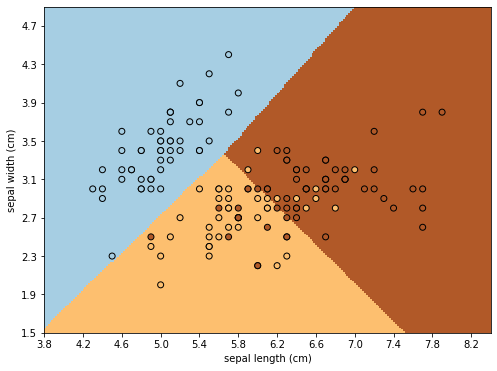

In [65]:
# load iris dataset
iris = load_iris()

X_idxs = itertools.combinations(range(len(iris.feature_names)), 2)
n = len(iris.feature_names) * (len(iris.feature_names) - 1) / 2

# visualize with matlibplot
plt.figure(figsize=(16, 12))

# combination of each 2 features
for i, X_idx in enumerate(X_idxs):
    X_train = iris.data[:, X_idx]
    y_train = iris.target

    # train logistic regression model
    logreg = LogisticRegression(solver='liblinear', multi_class='auto', C=1e5)
    logreg.fit(X_train, y_train)

    # init x/y-axis and predict x/y-meshgrid
    h = .02
    xx_min = X_train[:, 0].min() - .2
    xx_max = X_train[:, 0].max() + .2
    yy_min = X_train[:, 1].min() - .2
    yy_max = X_train[:, 1].max() + .2
    xx, yy = np.meshgrid(np.arange(xx_min, xx_max, h), np.arange(yy_min, yy_max, h))
    pre_data = np.c_[xx.ravel(), yy.ravel()]
    z = logreg.predict(pre_data)

    z = z.reshape(xx.shape)
    
    # format
    axes = plt.subplot(int(n / 2), 2, i + 1, label='axes_%d' % (i + 1), 
                       xlabel=iris.feature_names[X_idx[0]],
                       ylabel=iris.feature_names[X_idx[1]],
                       xlim=(xx.min(), xx.max()),
                       ylim=(yy.min(), yy.max()),
                       xticks=np.arange(xx_min, xx_max, h * 20),
                       yticks=np.arange(yy_min, yy_max, h * 20))

    # background
    axes.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)

    # pred scatter - foreground
    axes.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)

plt.show()